In [1]:
import sys
import os
import sqlite3
import pandas as pd

In [2]:
print(os)

<module 'os' from 'C:\\Users\\14029\\anaconda3\\lib\\os.py'>


In [8]:
##Pull in URL data base
url = 'https://www.pgatour.com/stats.html'
##Reading in the HTML webpage
df1 = pd.read_html(url, header = 0)
##printing off driving table
df1[5]

,Rank,Leader,Avg.
0,1,Cameron Young,329.7
1,2,Byeong Hun An,322.4
2,3,Xander Schauffele,322.1
3,4,Joseph Bramlett,321.3
4,5,Rory McIlroy,321.1
5,Tour Average,Tour Average,296.7


In [9]:
dfdriveavg = df1[5]

In [ ]:
##printing off putting table

In [10]:
df1[10]

,Rank,Leader,Average
0,1,Beau Hossler,2.345
1,2,Rory McIlroy,1.504
2,3,Harry Hall,1.329
3,4,Brendon Todd,1.319
4,5,Grant Hirschman,1.226
5,Tour Average,Tour Average,NaN


In [ ]:
dfputtavg = df1[10]

In [51]:
##pull in CSV 
df2 = pd.read_csv("pga_tour_stats_2020v2.csv")
df2.head(10)

,PLAYER_NAME,FINISHES_OFFICIAL_MONEY,FINISHES_TOP10,TEE_AVG_DRIVING_DISTANCE,PUTTING_AVG_OVERALL
0,Zac Blair,"$745,273",1.0,280.9,1.589
1,Jimmy Walker,"$243,370",NaN,298.0,1.627
2,Cameron Percy,"$470,679",1.0,295.0,1.638
3,Sebastian Cappelen,"$371,482",1.0,303.7,1.609
4,Brian Gay,"$702,647",2.0,288.5,1.586
5,"Ted Potter, Jr.","$361,540",2.0,290.2,1.646
6,Arjun Atwal,"$63,252",NaN,286.5,1.638
7,Vaughn Taylor,"$1,148,779",2.0,281.6,1.562
8,Jason Dufner,"$306,781",NaN,286.2,1.645
9,Roger Sloan,"$253,597",NaN,291.5,1.607


In [53]:
##Show specific columns in relation to driving, putting, top 10 finishes and money earned
##Trimming data columns down to only show these 5 columns as I do not care about any of the other columns...
##...in relation to my hypothesis of 'do the top drivers or the top putters make the most money'
print(df2[['PLAYER_NAME','FINISHES_TOP10','FINISHES_OFFICIAL_MONEY','TEE_AVG_DRIVING_DISTANCE','PUTTING_AVG_OVERALL']])

            PLAYER_NAME  FINISHES_TOP10 FINISHES_OFFICIAL_MONEY  \
0             Zac Blair             1.0               $745,273    
1          Jimmy Walker             NaN               $243,370    
2         Cameron Percy             1.0               $470,679    
3    Sebastian Cappelen             1.0               $371,482    
4             Brian Gay             2.0               $702,647    
..                  ...             ...                     ...   
352    Patrick Fishburn             NaN                     NaN   
353       Chip McDaniel             NaN                     NaN   
354        Roberto Díaz             NaN                     NaN   
355         Peter Kuest             NaN                     NaN   
356          Jay McLuen             NaN                     NaN   

     TEE_AVG_DRIVING_DISTANCE  PUTTING_AVG_OVERALL  
0                       280.9                1.589  
1                       298.0                1.627  
2                       295.0       

array([[<AxesSubplot:title={'center':'FINISHES_TOP10'}>,
        <AxesSubplot:title={'center':'TEE_AVG_DRIVING_DISTANCE'}>],
       [<AxesSubplot:title={'center':'PUTTING_AVG_OVERALL'}>,
        <AxesSubplot:>]], dtype=object)

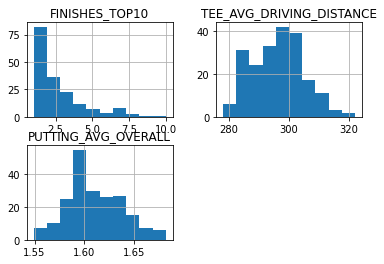

In [54]:
##Create visualizations to validate machine learning techniques
df2.hist(['FINISHES_TOP10','FINISHES_OFFICIAL_MONEY','TEE_AVG_DRIVING_DISTANCE','PUTTING_AVG_OVERALL'])

In [29]:
##view distributions for potential machine learning candidates
##Distribution graphs to help assist in visualization of which columns are necessary and why certain columns were trimmed
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]]##Display presentation between 1 & 50
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
plt.show()

C:\Users\14029\AppData\Local\Temp/ipykernel_16940/3905526784.py:11: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(nGraphRow, nGraphPerRow, i + 1)
C:\Users\14029\AppData\Local\Temp/ipykernel_16940/3905526784.py:11: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(nGraphRow, nGraphPerRow, i + 1)
C:\Users\14029\AppData\Local\Temp/ipykernel_16940/3905526784.py:11: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(nGraphRow, nGraphPerRow, i + 1)


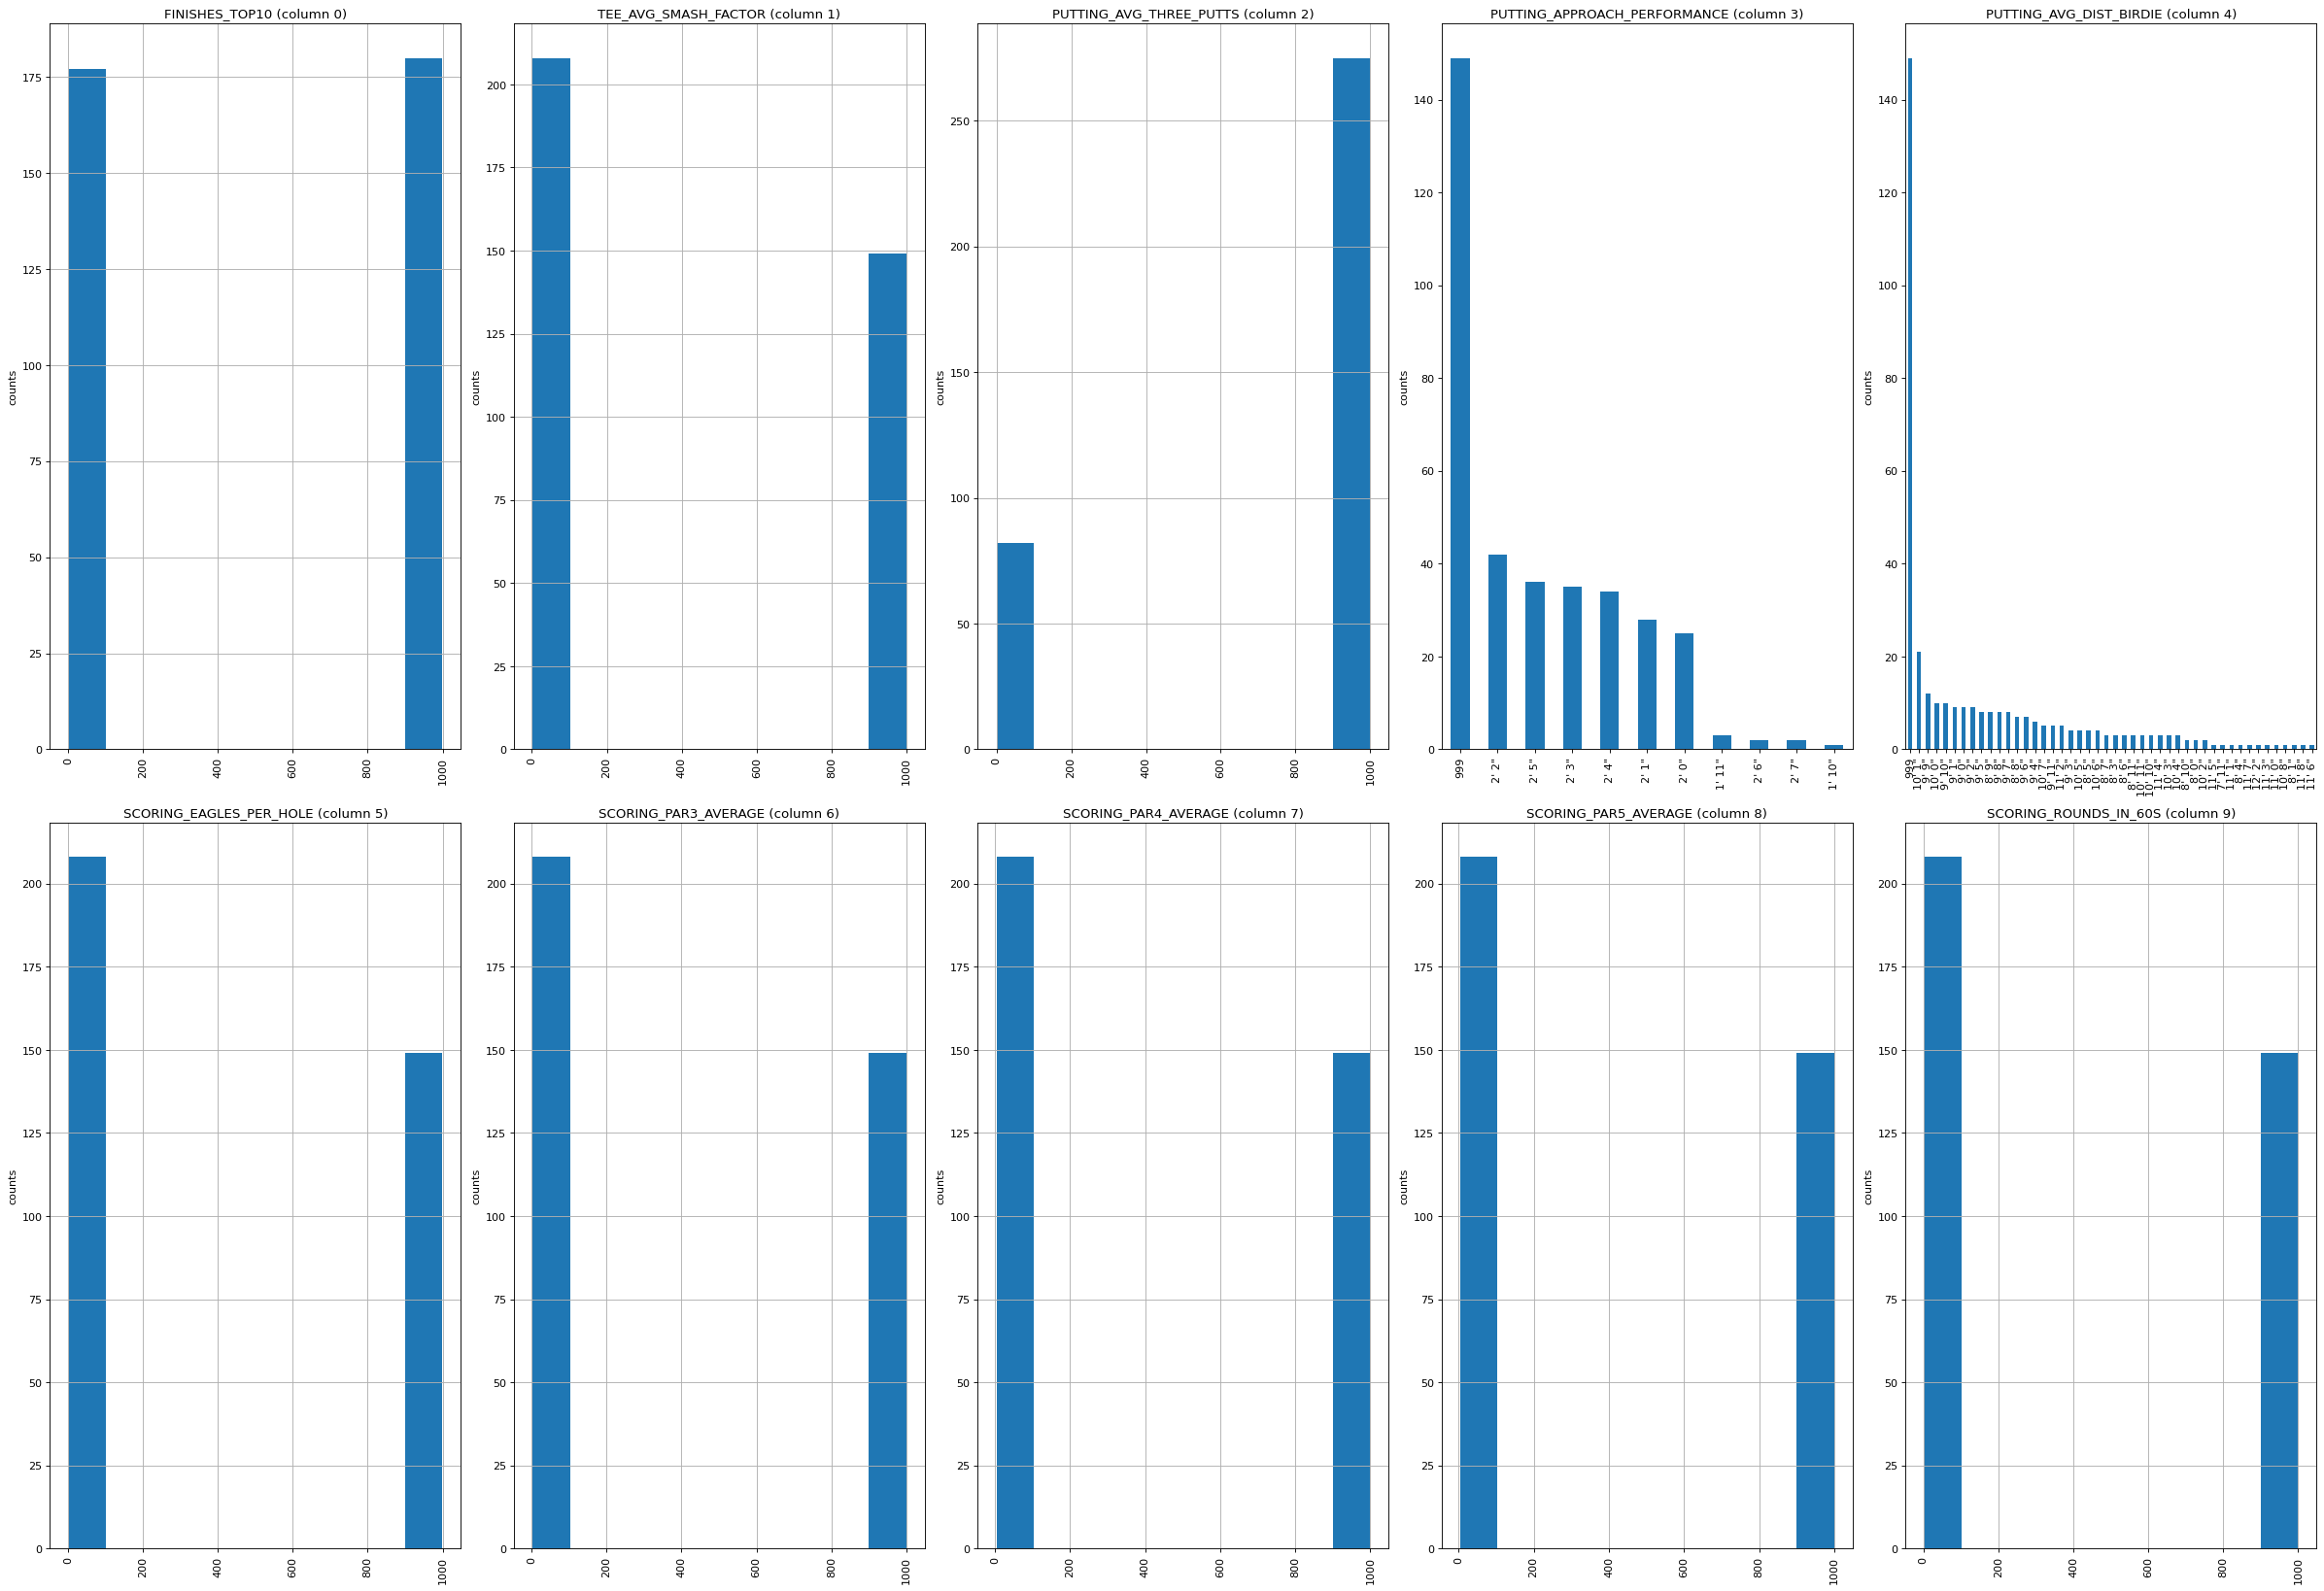

In [31]:
plotPerColumnDistribution(df2, 10, 5)

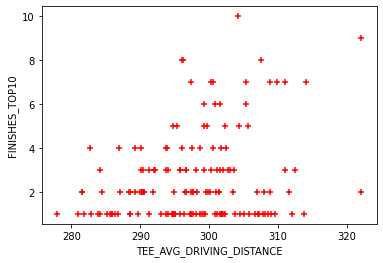

In [16]:
##Import visulization packages
import matplotlib.pyplot as plt

##Set up figsize
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)

##set up linea regression for driving and putting
import numpy as np
from sklearn import linear_model
%matplotlib inline
##Linear regression formual is y = mx+b
##Avg drive 296.3687500000001

##set up data for viewing
plt.xlabel('TEE_AVG_DRIVING_DISTANCE')
plt.ylabel('FINISHES_TOP10')
plt.scatter(df2.TEE_AVG_DRIVING_DISTANCE, df2.FINISHES_TOP10, color='red', marker='+')

In [17]:
##Train linear model
df2.replace([np.inf, -np.inf], np.nan, inplace=True)
df2.fillna(999, inplace=True)
reg = linear_model.LinearRegression()
reg.fit(df2[['FINISHES_TOP10']],df2.TEE_AVG_DRIVING_DISTANCE)

LinearRegression()

In [18]:
##Value of M or top 10 finishes 
reg.coef_

array([0.48807056])

In [19]:
##Value of B or average top 10 driving distance
reg.intercept_

343.19739404241653

In [20]:
##The top 10 drivers avg a distance of 343.19 yards off the tee

In [55]:
##create table from both databases to see if driving distance is comparable between sources
print(dfdriveavg)

           Rank             Leader   Avg.
0             1      Cameron Young  329.7
1             2      Byeong Hun An  322.4
2             3  Xander Schauffele  322.1
3             4    Joseph Bramlett  321.3
4             5       Rory McIlroy  321.1
5  Tour Average       Tour Average  296.7


In [26]:
np.mean([329.7, 322.4, 322.1, 321.3, 321.1])

323.32

In [28]:
##view avg diff and create a cumulative avg from URL and CSV files
##avg drive between both URL and csv files 333.255
np.mean([343.19, 323.32])

333.255

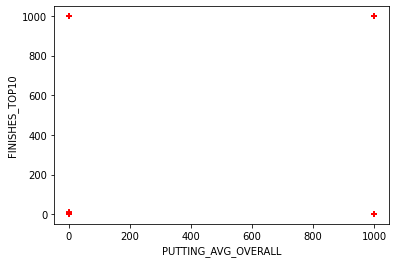

In [32]:
##setting up linear regression for putting analysis
import numpy as np
from sklearn import linear_model
%matplotlib inline
##Linear regression formual is y = mx+b
##Avg drive 296.3687500000001

##set up data for viewing
plt.xlabel('PUTTING_AVG_OVERALL')
plt.ylabel('FINISHES_TOP10')
plt.scatter(df2.PUTTING_AVG_OVERALL, df2.FINISHES_TOP10, color='red', marker='+')

In [34]:
##training linear model 
##data set not really equipped for linear regression for putting avg will need to find better model to use 
df2.replace([np.inf, -np.inf], np.nan, inplace=True)
df2.fillna(999, inplace=True)
reg = linear_model.LinearRegression()
reg.fit(df2[['FINISHES_TOP10']],df2.PUTTING_AVG_OVERALL)

LinearRegression()

In [35]:
##Value of M or top 10 finishes 
reg.coef_

array([0.69372458])

In [37]:
##Value of B or PUTTING_AVG_OVERALL
reg.intercept_

67.62700344940691

In [57]:
print(df2.head(10)[['PLAYER_NAME','FINISHES_TOP10','FINISHES_OFFICIAL_MONEY','TEE_AVG_DRIVING_DISTANCE','PUTTING_AVG_OVERALL']])

          PLAYER_NAME  FINISHES_TOP10 FINISHES_OFFICIAL_MONEY  \
0           Zac Blair             1.0               $745,273    
1        Jimmy Walker             NaN               $243,370    
2       Cameron Percy             1.0               $470,679    
3  Sebastian Cappelen             1.0               $371,482    
4           Brian Gay             2.0               $702,647    
5     Ted Potter, Jr.             2.0               $361,540    
6         Arjun Atwal             NaN                $63,252    
7       Vaughn Taylor             2.0             $1,148,779    
8        Jason Dufner             NaN               $306,781    
9         Roger Sloan             NaN               $253,597    

   TEE_AVG_DRIVING_DISTANCE  PUTTING_AVG_OVERALL  
0                     280.9                1.589  
1                     298.0                1.627  
2                     295.0                1.638  
3                     303.7                1.609  
4                     288.5  

In [60]:
df2.head(10).sort_values(by='FINISHES_OFFICIAL_MONEY')

,PLAYER_NAME,FINISHES_OFFICIAL_MONEY,FINISHES_TOP10,TEE_AVG_DRIVING_DISTANCE,PUTTING_AVG_OVERALL
7,Vaughn Taylor,"$1,148,779",2.0,281.6,1.562
1,Jimmy Walker,"$243,370",NaN,298.0,1.627
9,Roger Sloan,"$253,597",NaN,291.5,1.607
8,Jason Dufner,"$306,781",NaN,286.2,1.645
5,"Ted Potter, Jr.","$361,540",2.0,290.2,1.646
3,Sebastian Cappelen,"$371,482",1.0,303.7,1.609
2,Cameron Percy,"$470,679",1.0,295.0,1.638
6,Arjun Atwal,"$63,252",NaN,286.5,1.638
4,Brian Gay,"$702,647",2.0,288.5,1.586
0,Zac Blair,"$745,273",1.0,280.9,1.589


In [ ]:
##here we can see that the while Vaughn Taylor has the lowest avg drive he has the lowest putt avg and also has
##made the most money confirming that the best putters make the most money in tournaments